### 🛡️ Phishing URL Detection - Functional Overview
This cell imports necessary libraries for this phishing URL detection project:
- `pandas`, `numpy`: Data handling and numerical operations.
- `matplotlib.pyplot`, `seaborn`: Visualization tools.
- `sklearn`: Machine learning utilities like model selection, scaling, and classifiers.
These libraries form the core framework for feature processing, training, and evaluating phishing classifiers.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from urllib.parse import urlparse
import os.path
import re

### Phishing URL Detection - Functional Overview
1) This cell loads the dataset that contains URL samples and their associated features. Each record represents a URL with attributes that indicate patterns typical to malicious websites (e.g., number of special characters, usage of IPs, etc.), and a target label ('result') showing whether it's phishing or benign.

In [40]:
urldata = pd.read_csv("malicious_urls/urldata.csv")

### Sample Data from dataset

In [42]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [41]:
s_dataset = urldata.sample(frac =1).reset_index(drop=True)

In [43]:
urldata = urldata.drop('Unnamed: 0',axis=1)


In [7]:
urldata.shape

(450176, 3)

In [8]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64


### 🛡️ 2. This cell performs relevant data processing and feature engineeiring. we have created URL lenth , hostname lenghth and path lengths as attributes.

In [46]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))


In [47]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))


### 🛡️ 3. This cell performs feature engineeiring. we have created counts for ( Special charecters within the URL ) and also falg HTTP or HTTPs .

In [49]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [50]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [51]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [52]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [53]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0


### 🛡️ Cell Purpose: Phishing URL Detection - Functional Overview
This cell imports necessary libraries for this phishing URL detection project:
- `pandas`, `numpy`: Data handling and numerical operations.
- `matplotlib.pyplot`, `seaborn`: Visualization tools.
- `sklearn`: Machine learning utilities like model selection, scaling, and classifiers.
These libraries form the core framework for feature processing, training, and evaluating phishing classifiers.

### 🛡️ Use of IP or not in domain

In [55]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

### 🛡️ Usage of shortening service with in the URL 

In [56]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

### 🛡️ Sample Data after feature Extarction 

In [ ]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


### 🛡️ visualization of heat map.

<Axes: >

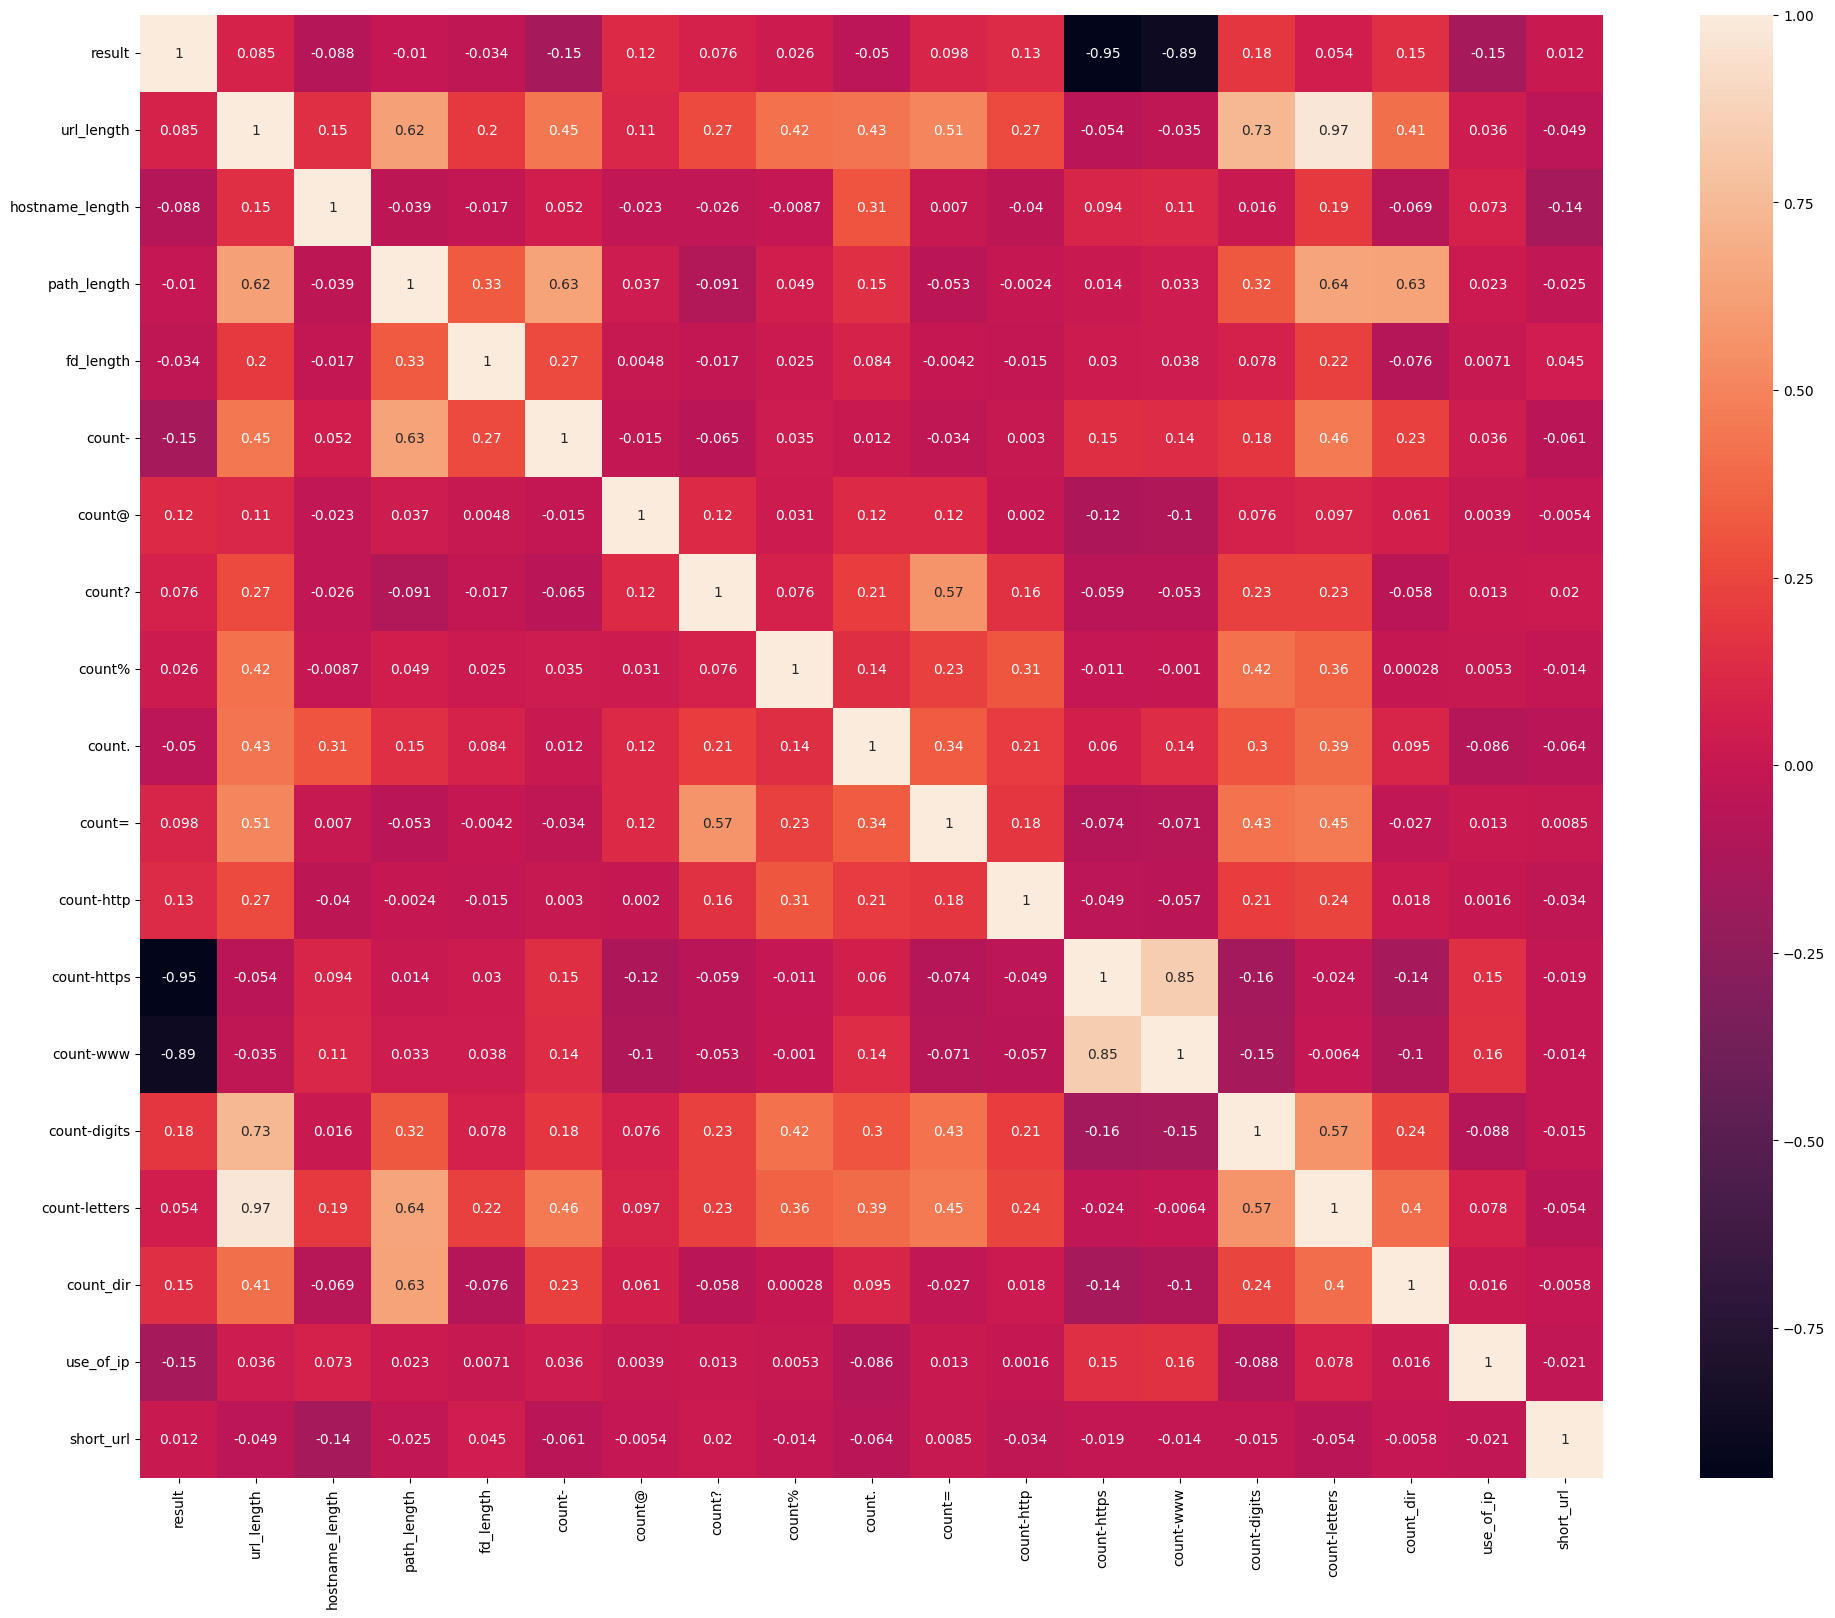

In [22]:
numeric_data = urldata.select_dtypes(include='number')
corrmat = numeric_data.corr()
plt.figure(figsize=(25, 19))
sns.heatmap(corrmat, square=True, annot=True, annot_kws={'size': 10})


Text(0, 0.5, 'Number Of URLs')

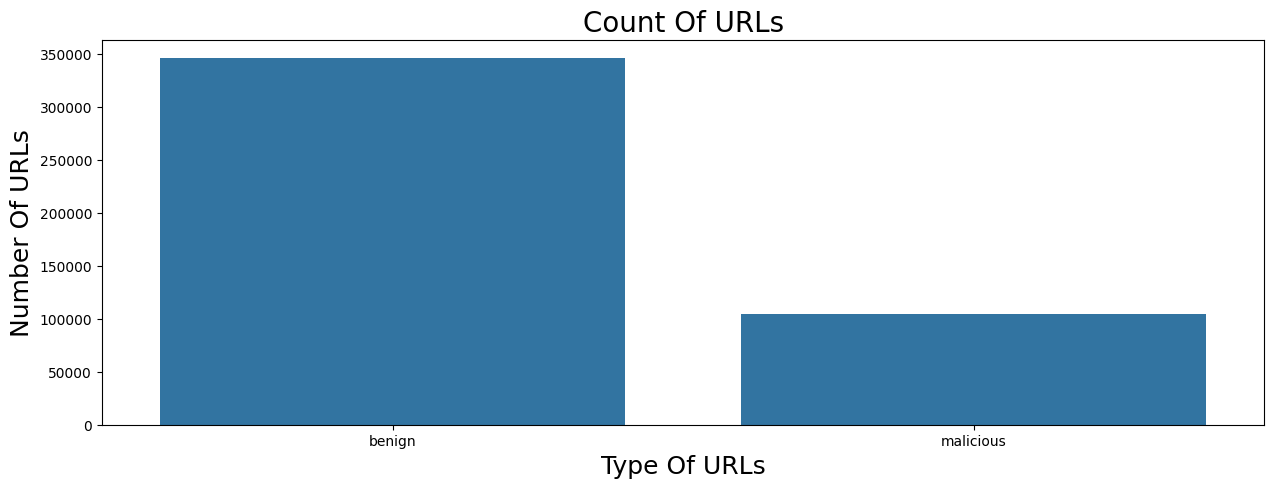

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

### 🛡️ Percentage of Malicious URLs over Benign ones 

In [24]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


(0.0, 1000.0)

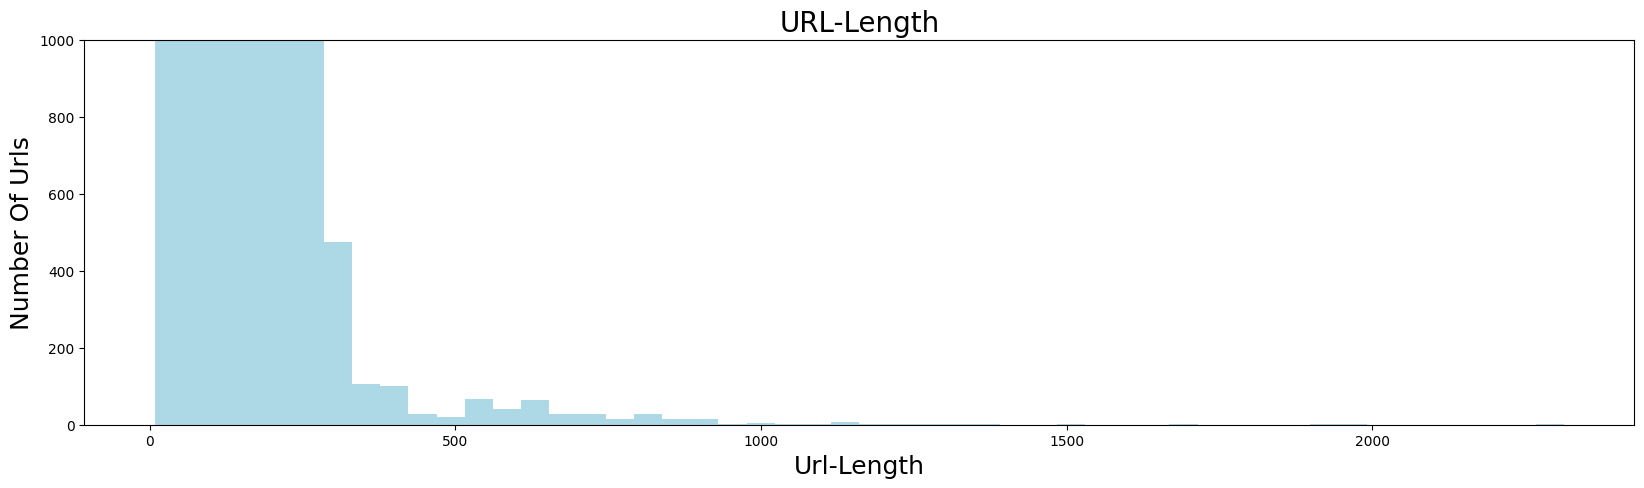

In [25]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

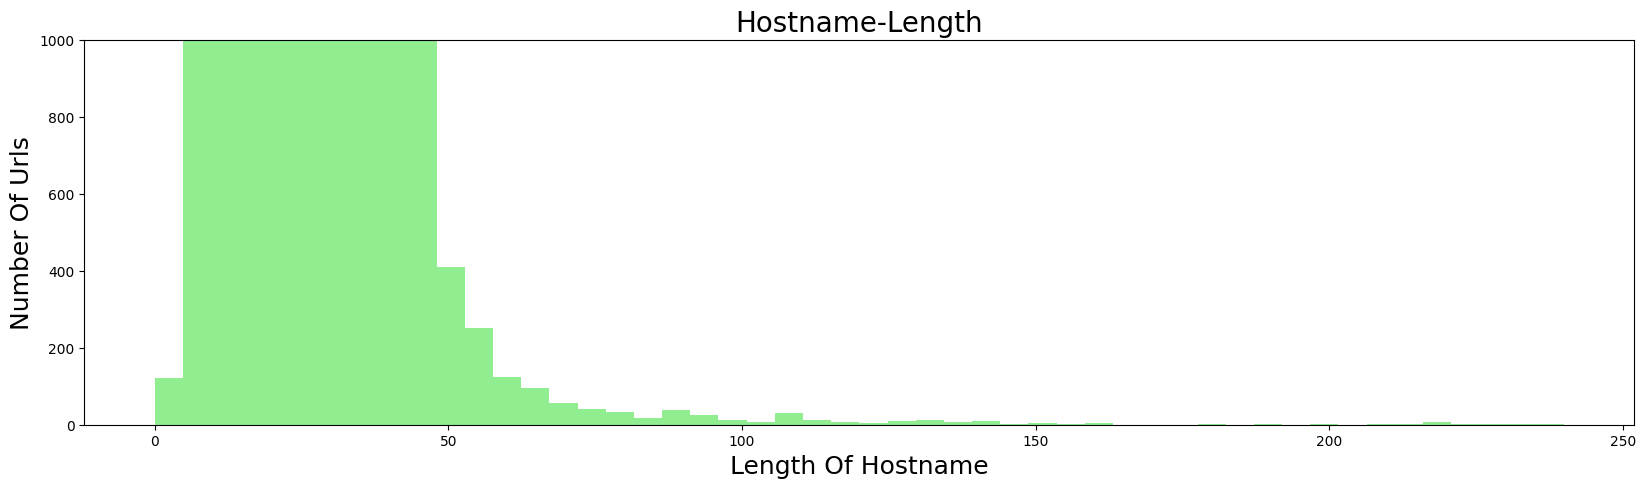

In [26]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

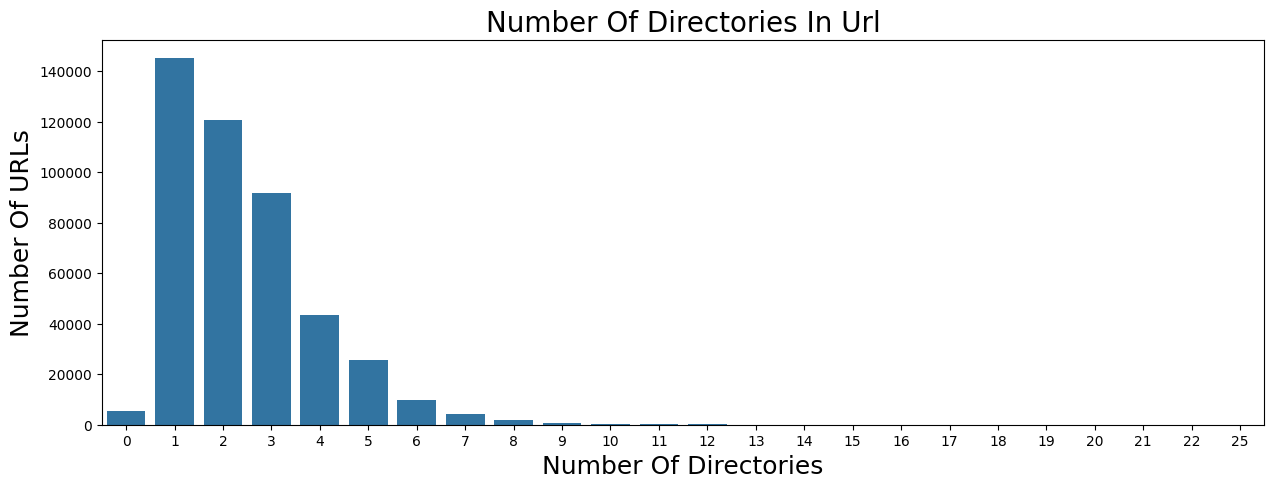

In [27]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)


Text(0, 0.5, 'Number Of URLs')

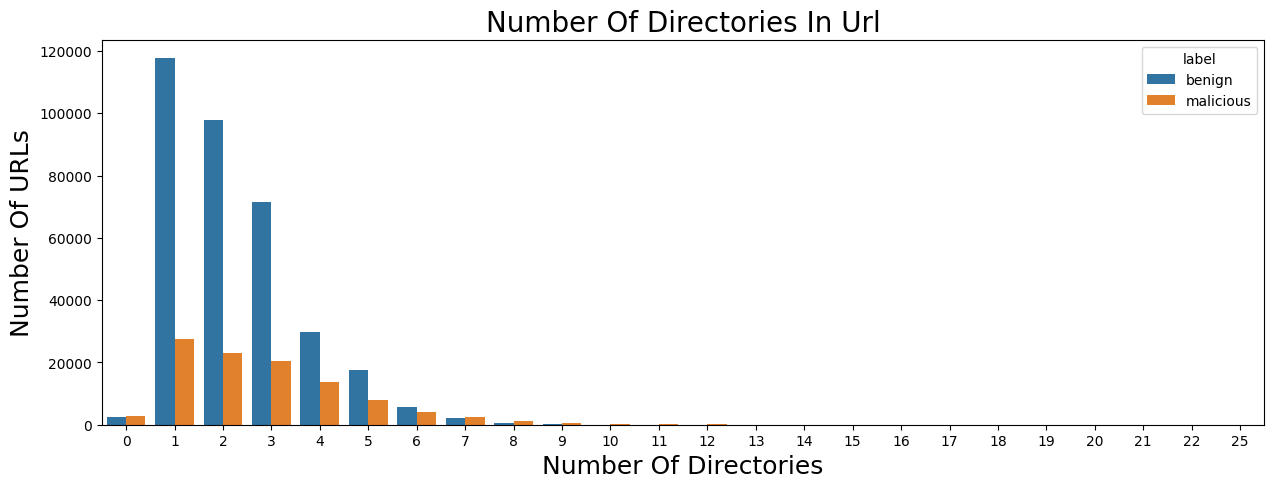

In [28]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

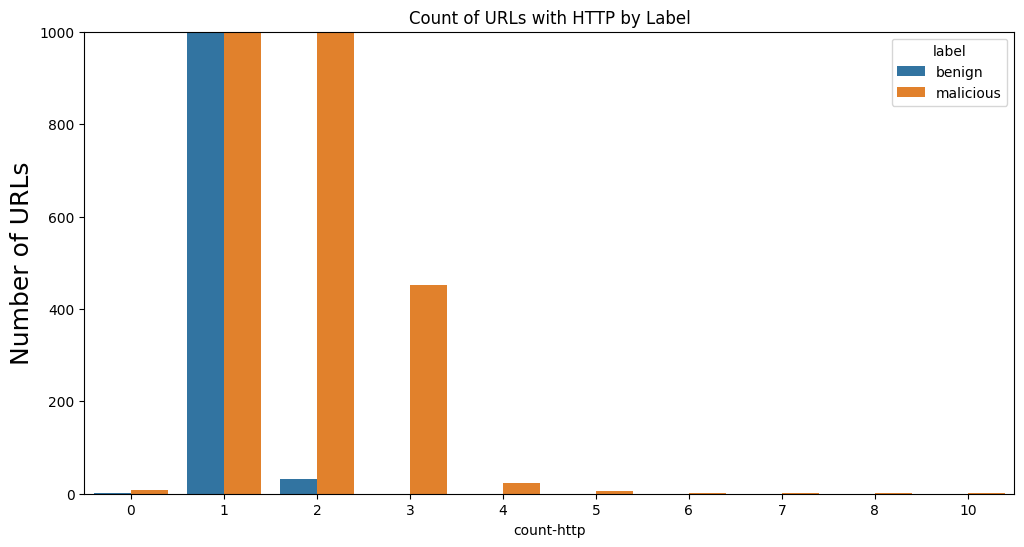

In [29]:
plt.figure(figsize=(12, 6))
plt.ylabel("Number of URLs", fontsize=18)
plt.ylim((0, 1000))
sns.countplot(x='count-http', hue='label', data=urldata)
plt.title("Count of URLs with HTTP by Label")
plt.show()

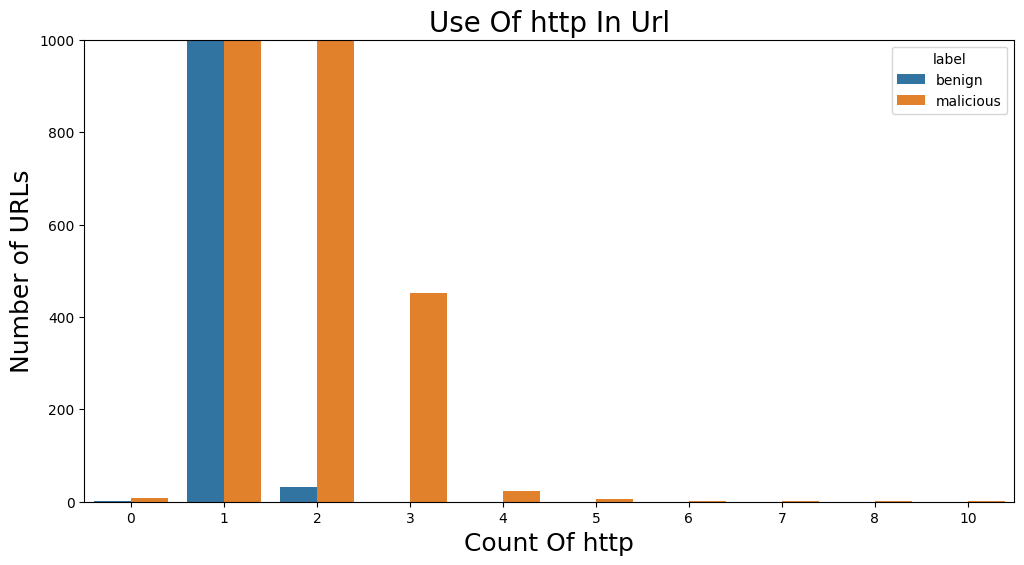

In [30]:
plt.figure(figsize=(12, 6))
plt.title("Use Of http In Url", fontsize=20)
plt.xlabel("Count Of http", fontsize=18)
plt.ylabel("Number of URLs", fontsize=18)

sns.countplot(x='count-http', hue='label', data=urldata)

plt.ylim((0, 1000))
plt.show()

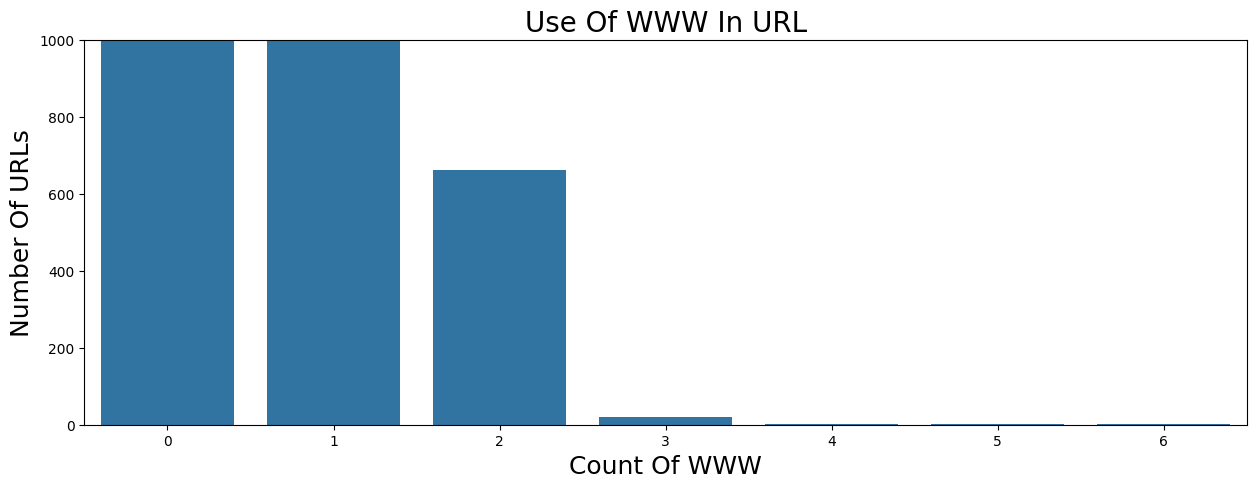

In [31]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL", fontsize=20)
plt.xlabel("Count Of WWW", fontsize=18)
sns.countplot(x='count-www', data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs", fontsize=18)
plt.show()


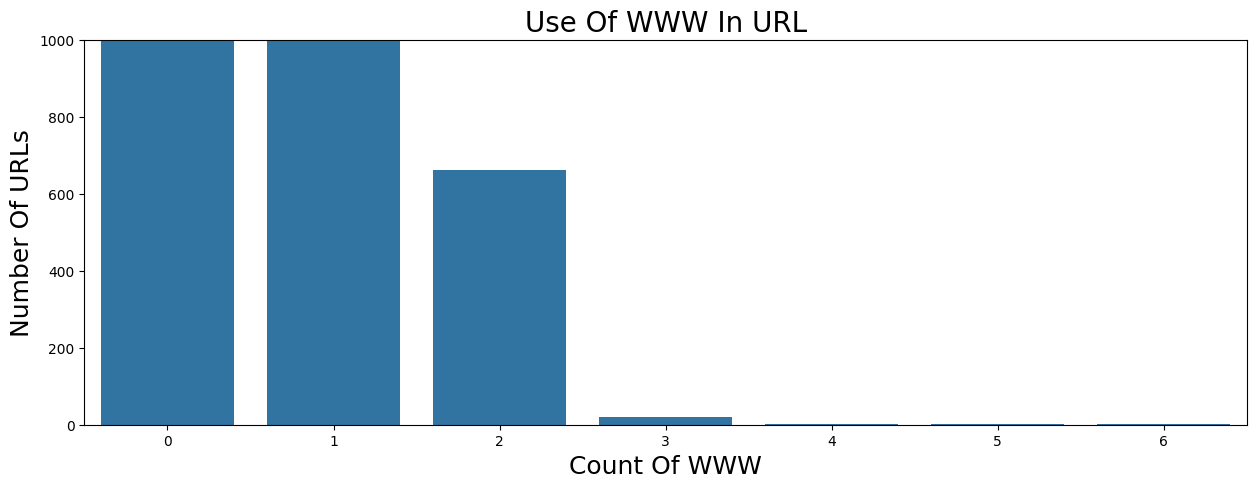

In [32]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL", fontsize=20)
plt.xlabel("Count Of WWW", fontsize=18)
sns.countplot(x='count-www', data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs", fontsize=18)
plt.show()


# After visualization and feture Extarction the dataset We have 

In [66]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


### 🛡️ Phishing URL Detection 
This cell imports necessary libraries for this phishing URL detection project:
- `pandas`, `numpy`: Data handling and numerical operations.
- `matplotlib.pyplot`, `seaborn`: Visualization tools.
- `sklearn`: Machine learning utilities like model selection, scaling, and classifiers.
These libraries form the core framework for feature processing, training, and evaluating phishing classifiers.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



## 🛡️This block prepares  machine learning pipeline for training by:

Selecting key phishing-related features.

Preprocessing the dataset.

Evaluating multiple models with hyperparameter tuning.

The goal is to identify which model and configuration can best detect phishing URLs based on learned patterns from the training data.

In [ ]:
X = urldata[['hostname_length', 'path_length', 'fd_length', 'count-', 'count@', 'count?',
             'count%', 'count.', 'count=', 'count-http', 'count-https', 'count-www',
             'count-digits', 'count-letters', 'count_dir', 'use_of_ip']]
y = urldata['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = [
    ("DecisionTree", DecisionTreeClassifier(random_state=42), {
        "min_samples_split": range(10, 200, 20),
        "max_depth": range(1, 20, 2)
    }),
    ("RandomForest", RandomForestClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 3],
        "max_features": ['sqrt'],
        "bootstrap": [True]
    }),
    ("LogisticRegression", LogisticRegression(random_state=42, max_iter=500), {
        "C": np.logspace(-3, 3, 5),
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    })
]


cv_results = []
best_models = []

for name, model, params in models:
    print(f"Tuning: {name}")
    grid = GridSearchCV(model, param_grid=params, cv=StratifiedKFold(n_splits=5),
                        scoring='accuracy', n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    best_models.append((name, grid.best_estimator_))
    cv_results.append({
        "Model": name,
        "Best Score": grid.best_score_,
        "Best Params": grid.best_params_
    })

Tuning: DecisionTree
Tuning: RandomForest
Tuning: LogisticRegression


# 🧾 Create DataFrame from cross-validation results and sort

                Model  Best Score  \
1        RandomForest    0.997237   
0        DecisionTree    0.997098   
2  LogisticRegression    0.996576   

                                         Best Params  
1  {'bootstrap': True, 'max_features': 'sqrt', 'm...  
0        {'max_depth': 11, 'min_samples_split': 170}  
2  {'C': 1.0, 'penalty': 'l1', 'solver': 'libline...  


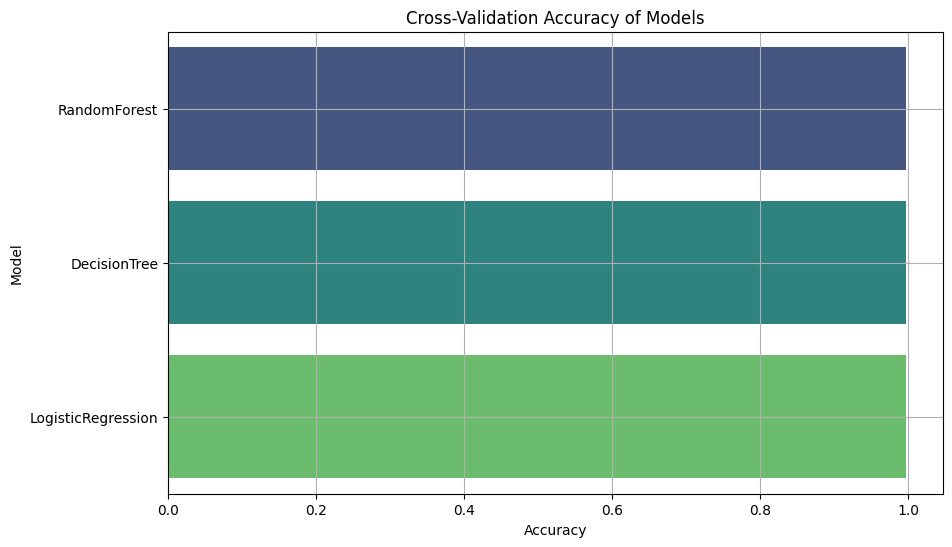

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # 🔕 Ignore all warnings

# 🧾 Create DataFrame from cross-validation results and sort
results_df = pd.DataFrame(cv_results).sort_values(by="Best Score", ascending=False)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x="Best Score", y="Model", data=results_df, palette="viridis")
plt.title("Cross-Validation Accuracy of Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.grid(True)
plt.show()


### 🏆 Model Comparison Results
After tuning and training our models, we evaluated their cross-validation performance based on accuracy. Below is a summary of the results:

| Model                 | Best Accuracy Score | Best Hyperparameters                                                                                              |
| --------------------- | ------------------- | ----------------------------------------------------------------------------------------------------------------- |
|  Random Forest       | **0.9972**          | `{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}` |
|  Decision Tree       | 0.9971              | `{'max_depth': 11, 'min_samples_split': 170}`                                                                     |
|  Logistic Regression | 0.9966              | `{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}`                                                              |
